# Using OpenSeesPy on DesignSafe
### May 22, 2019
### Prof. Michael H. Scott, Oregon State University

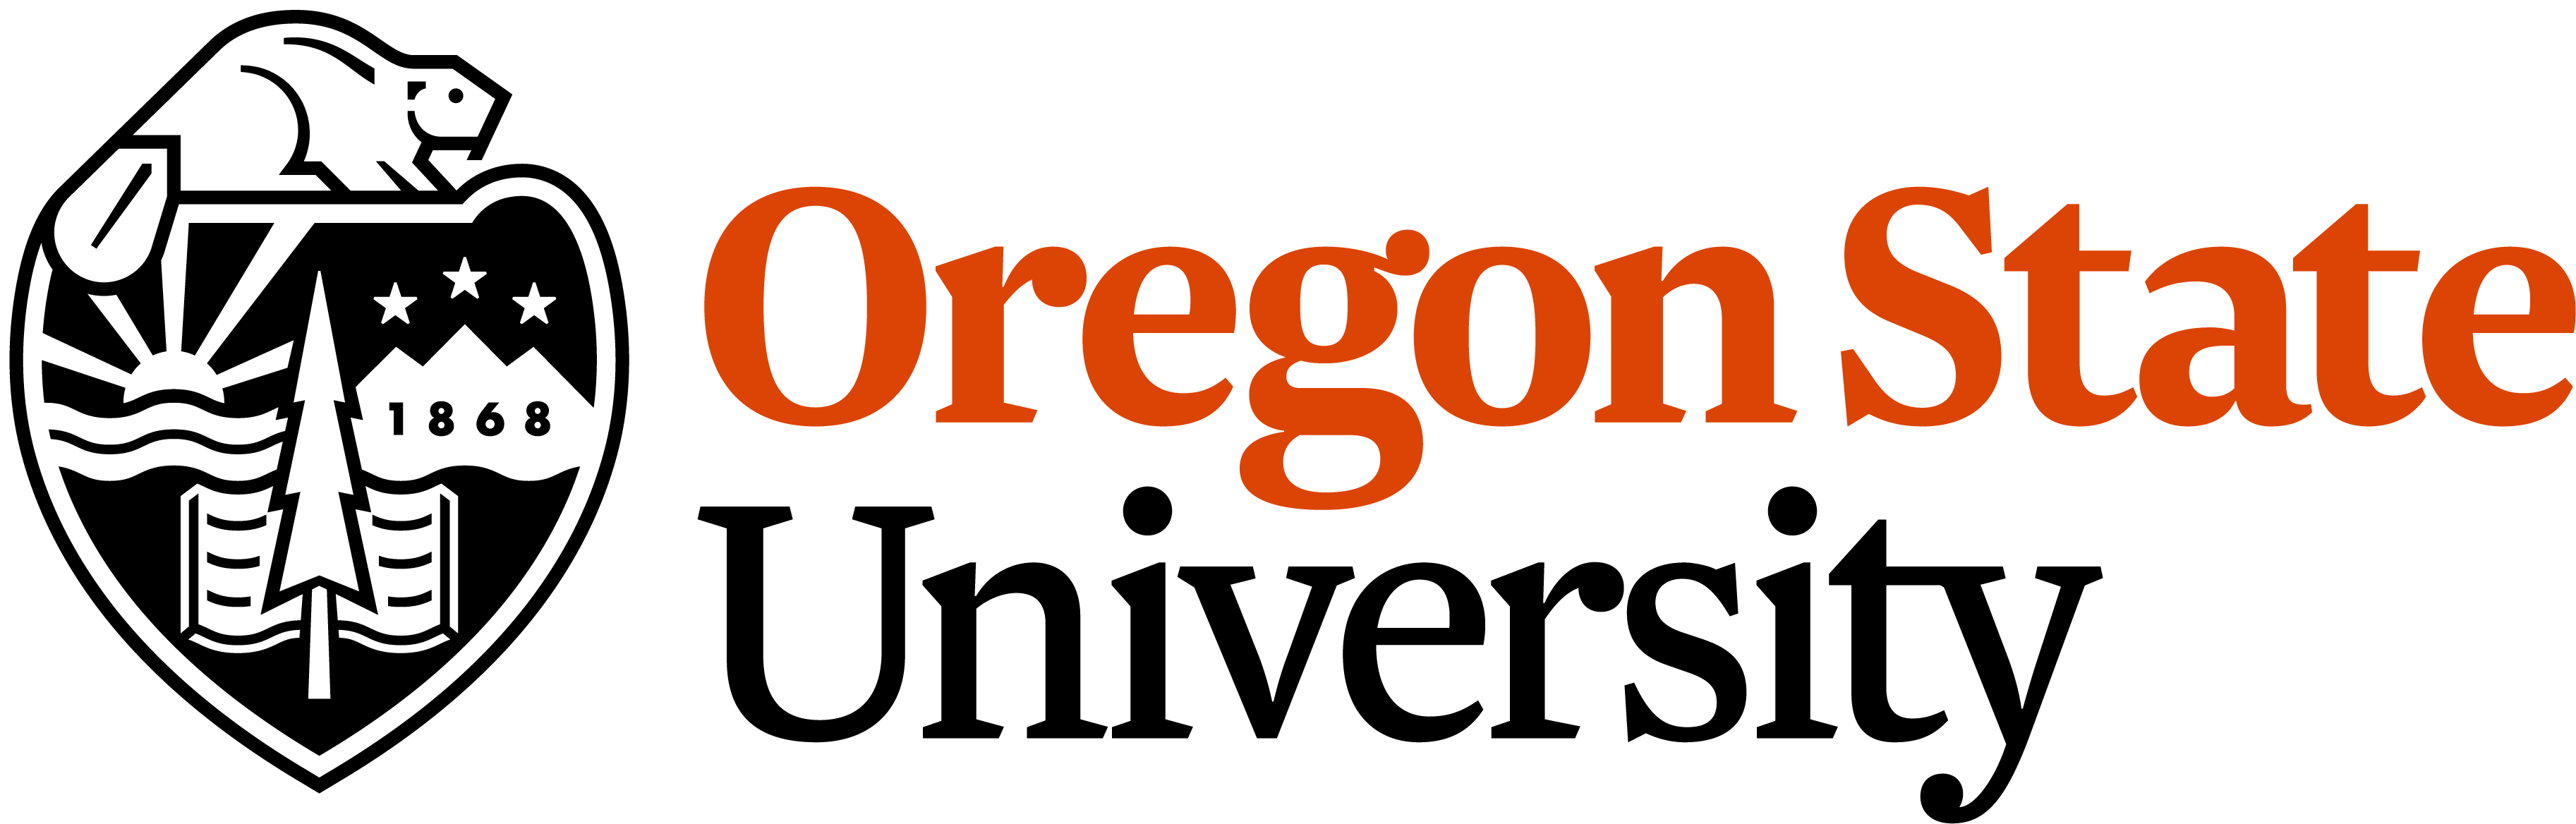

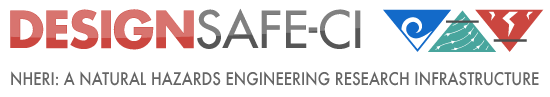

# Outline of Webinar

1. ### Overview and Background
2. ### Models Available in OpenSeesPy
3. ### Differences between OpenSees Python and Tcl
4. ### Example Frame Analysis
    + #### Static Analysis
    + #### Response History Analysis
5. ### Running OpenSeesPy in a Terminal
6. ### Questions

# Assumed Background for this Webinar

+ ### You have used OpenSees
+ ### You know some Python3
+ ### You are familiar with Jupyter Notebooks

# Objectives of this Webinar

+ ### Show high level differences between OpenSeesPy and OpenSeesTcl, aka ''OpenSees''
+ ### Simple integration of OpenSeesPy analysis with numpy and pyplot
+ ### Go through an example without getting in to modeling details

# Overview of OpenSees

+ ### Widely used finite element analysis framework
+ ### Analysis of structural and geotechnical systems subjected to earthquakes and tsunamis
+ ### Computational core written in C++ with some FORTRAN solvers and constitutive models
+ ### Integrated with Tcl for model building and analysis
    + #### Tcl is a powerful string-based scripting language
    + #### The syntax of Tcl is awkward -- set a 5, set b [expr 5*$\$$a], etc.
    + #### Very few Tcl libraries for scientific programming
+ ### Python offers an intuitive syntax and large ecosystem of scientific libraries

# Background of OpenSeesPy

+ ### Developed by Dr. Minjie Zhu with guidance from Dr. Frank McKenna
+ ### OpenSees model building and analysis commands built with Python API
+ ### Description of multiple interpreter architecture
    + #### Zhu, M., McKenna, F., and Scott, M.H. ''OpenSeesPy: Python library for the OpenSees finite element framework.'' *SoftwareX*, 7:6-11, 2018. https://doi.org/10.1016/j.softx.2017.10.009
+ ### Documentation
    + #### OpenSees Python: https://openseespydoc.readthedocs.io
    + #### OpenSees Wiki: http://opensees.berkeley.edu/wiki/index.php/OpenSees_User 
    (Tcl format, but Python commands have the same order of inputs)

# What is Available in OpenSeesPy

+ ### All structural and geotechnical finite elements and constitutive models
+ ### All analysis algorithms, equation solvers, integrators, etc.
+ ### Python commands in progress
    + #### Finite element reliability analysis (T. Haukaas)
    + #### Structural fire analysis (A. Usmani)
+ ### Fluid-structure interaction (FSI) using the Particle Finite Element Method (PFEM)
    + #### Developed by Dr. Minjie Zhu
    + #### Zhu, M. and Scott, M.H. *Modeling fluid–structure interaction by the particle finite element method in OpenSees.* Computers and Structures, 132:12-21, 2014. https://doi.org/10.1016/j.compstruc.2013.11.002
    + #### Example OpenSeesPy FSI scripts: https://openseespydoc.readthedocs.io/en/latest/src/tsunami.html

# Using OpenSeesPy on JupyterHub at DesignSafe

+ ### OpenSeesPy is a Python3 module
+ ### DesignSafe's image contains a pip installation of OpenSeesPy
+ ### Install locally using 'pip install openseespy'
    + #### Links to correct Python versions
    + #### Windows and Linux versions
    + #### MacOS in progress
    + #### More details: https://openseespydoc.readthedocs.io
+ ### At JupyterHub on DesignSafe, create a Python3 notebook in MyData/ 

In [1]:
#
# Import OpenSeesPy just like you would any other Python module
# We'll call it ops, but you can name it whatever you want
#
import numpy as np
import matplotlib.pyplot as plt
import openseespy.opensees as ops

ops.wipe()
ops.model('basic','-ndm',2,'-ndf',3)

# Basic OpenSeesPy Command Format

+ ### Follows the same input sequence as OpenSees Tcl commands
+ ### OpenSeesPy syntax is not ''Pythonic''
    + #### Keep it as similar to OpenSeesTcl as possible
    + #### Easy to transition from OpenSeesTcl to OpenSeesPy

### Tcl code to create a truss element in OpenSees

<code>
# Native Tcl variables
set E 29000.0
set A 23.2
#                       tag  E
uniaxialMaterial Elastic 10 $E
#             tag ndI ndJ matTag area
element truss  1   1   2    10    $A
</code>

### Equivalent Python code with OpenSees

<code>
# Native Python variables
E = 29000.0
A = 23.2
#                              tag,E
ops.uniaxialMaterial('Elastic', 10,E)
#                   tag,ndI,ndJ,matTag,area
ops.element('truss', 1,  1,  2,   10,    A)
</code>

# Scoping in OpenSeesPy

### OpenSeesTcl fiber section and load pattern input enclosed in braces { }

<code>
section Fiber 1 {
    patch quadr ...
    layer straight ...
}
</code>

### OpenSeesPy does not use indentation for scoping of fiber sections
#### Patches and layers map back to most recent fiber section definition

<code>
ops.section('Fiber',1)
ops.patch('quadr',...)
ops.layer('straight',...)
</code>

### Same approach for load patterns
#### Reference loads map back to most recent load pattern definition

<code>
ops.timeSeries('Linear',12)
ops.pattern('Plain',1,12)
ops.load(3,...)           # Load on node 3
ops.eleLoad('-ele',5,...) # Member load on element 5
ops.sp(4,...)             # Single point constraint on node 4
</code>

## Note: you still need to use indentation for native Python code -- loops, conditionals, functions, etc.

# Other Differences between OpenSeesPy and OpenSeesTcl

### print() is reserved in native Python

<code>
ops.printModel()
</code>

### beamIntegration objects required for beam-column elements

<code>
ops.section('Elastic',1,...)  # or Fiber, etc.
ops.geomTransf('Linear',9)    # or PDelta or Corotational
Np = 5
ops.beamIntegration('Lobatto',8,1,Np)  # or Legendre, HingeRadau, etc.
#                             tag,ndI,ndJ,transfTag,integrTag
ops.element('forceBeamColumn', 1,  1,  2,     9,        8)
</code>

### Python3 *does not* use integer division

+ 1/4 evaluates to 0 in Tcl and Python2
+ 1/4 evaluates to 0.25 in Python3

In [2]:
1/4

0.25

### Use floating point values where floating point values are expected in OpenSees commands

+ #### You will get an 'Invalid data' error if you input an integer for a floating point parameter
+ #### This will be fixed in future versions of OpenSeesPy

In [3]:
ops.wipe()
ops.model('basic','-ndm',2)

# Change E to integer 29000 and you will get an input error 
# This will be fixed in future versions of OpenSeesPy
E = 29000.0
ops.uniaxialMaterial('Elastic',1,E)

### Passing vectors as list input, e.g., Path time series

+ #### Use a native Python list or a numpy.array to store values
+ #### Dereference the list or array using *

In [4]:
ops.wipe()
ops.model('basic','-ndm',2)

time = [0.1,0.2,0.3]            # Native Python list
force = np.array([5.0,2.0,8.0]) # numpy array
ops.timeSeries('Path',4,'-time',*time,'-values',*force,'-prependZero')

# Example Structural Model

+ #### A36 columns, A992 beams

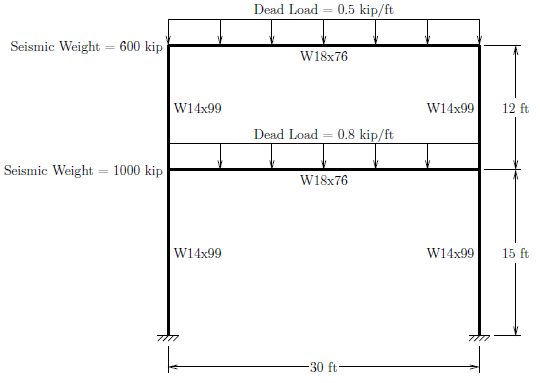

### Defining base and derived units as native Python variables

In [5]:
# Base units
kip = 1.0
inch = 1.0
sec = 1.0

# Derived units
ft = 12*inch
ksi = kip/inch**2

# Gravitational constant
g = 386.4*inch/sec**2

### Structural properties and loads

In [6]:
# Steel modulus
E = 29000*ksi

# Yield strength of columns and girders
Fyc = 36.0*ksi # A36
Fyg = 50.0*ksi # A992

# Dead loads
wD2 = 0.8*kip/ft
wDroof = 0.5*kip/ft

# Seismic weights
W2 = 1000*kip
Wroof = 600*kip

## Generally, it is good practice to define your OpenSees model and analysis in one Jupyter Notebook cell

+ ### Start cell with ops.wipe()
+ ### Avoid duplicate tag definitions when you re-run the cell
+ ### OK to define units, properties, etc. in prior cells (as above)

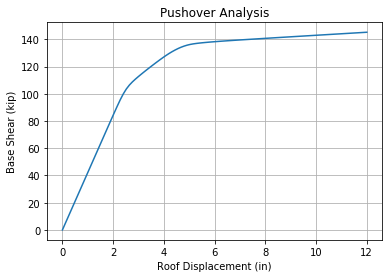

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import openseespy.opensees as ops

ops.wipe()
ops.model('basic','-ndm',2,'-ndf',3)

# Nodes and boundary conditions
ops.node(1,0.0,0.0); ops.fix(1,1,1,1)
ops.node(2,0.0,15.0*ft)
ops.node(3,0.0,27.0*ft)
ops.node(4,30.0*ft,27.0*ft)
ops.node(5,30.0*ft,15.0*ft)
ops.node(6,30.0*ft,0.0); ops.fix(6,1,1,1)

# Define nodal masses
m2 = 0.5*W2/g
mroof = 0.5*Wroof/g
ops.mass(2,m2,m2,0.0)
ops.mass(5,m2,m2,0.0)
ops.mass(3,mroof,mroof,0.0)
ops.mass(6,mroof,mroof,0.0)

# Columns, W14x99
ops.geomTransf('Corotational',32) # columns
ops.uniaxialMaterial('Steel02',1,Fyc,E,0.005)
d = 14.2*inch
bf = 14.6*inch
tw = 0.485*inch
tf = 0.780*inch
ops.section('WFSection2d',1,1,d,tw,bf,tf,20,4)
ops.beamIntegration('Lobatto',1,1,4)
ops.element('forceBeamColumn',1,1,2,32,1) # left first floor
ops.element('forceBeamColumn',2,2,3,32,1) # left second floor
ops.element('forceBeamColumn',3,6,5,32,1) # right first floor
ops.element('forceBeamColumn',4,5,4,32,1) # right second floor

# Girders, W18x76
ops.geomTransf('Linear',11)
ops.uniaxialMaterial('Steel02',2,Fyg,E,0.005)
d = 18.2*inch
bf = 11.0*inch
tw = 0.425*inch
tf = 0.680*inch
ops.section('WFSection2d',2,2,d,tw,bf,tf,20,4)
ops.beamIntegration('Lobatto',2,2,5)
ops.element('forceBeamColumn',5,2,5,11,2) # second floor
ops.element('forceBeamColumn',6,3,4,11,2) # roof

# Gravity loads in a constant time series
ops.timeSeries('Constant',1)
ops.pattern('Plain',1,1)
ops.eleLoad('-ele',5,'-type','-beamUniform',-wD2)
ops.eleLoad('-ele',6,'-type','-beamUniform',-wDroof)

ops.numberer('RCM')
ops.system('UmfPack')
ops.constraints('Plain')

ops.test('NormUnbalance',1.0e-8,10,0)
ops.algorithm('Newton')

# One analysis to get frame in equilibrium under gravity loads
ops.integrator('LoadControl',0.0)


ops.analysis('Static')
ops.analyze(1)

# Now switch to pushover analysis
ops.timeSeries('Linear',2)
ops.pattern('Plain',2,2)
# Equal reference load on each floor (uniform vertical distribution of lateral loads)
ops.load(2,0.5,0.0,0.0)
ops.load(3,0.5,0.0,0.0)

Umax = 1.0*ft
Nsteps = 100
dU = Umax/Nsteps
ops.integrator('DisplacementControl',3,1,dU)

Uplot = ops.nodeDisp(3,1)
Pplot = ops.getLoadFactor(2)
for i in range(Nsteps):
    ok = ops.analyze(1)
    if ok < 0:
        break
    Pplot = np.append(Pplot,ops.getLoadFactor(2))
    Uplot = np.append(Uplot,ops.nodeDisp(3,1))

plt.plot(Uplot,Pplot)
plt.xlabel('Roof Displacement (in)')
plt.ylabel('Base Shear (kip)')
plt.title('Pushover Analysis')
plt.grid()
plt.show()

## The nonlinear dynamic analysis is in a separate cell for the sake of demonstration

+ ### Usually best to have entire model and all analyses in one cell
+ ### If using OpenSeesPy locally, e.g., on your Windows or Linux machine, the concept of ''cells'' goes away
+ ### Ground motion file, tabasFN.txt, is read from MyData/ directory

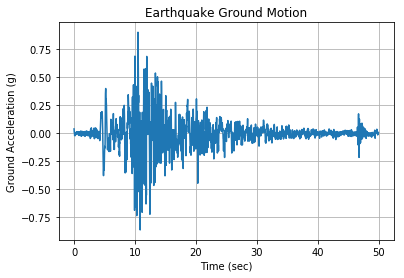

msg: WARNING analysis Transient - no Integrator specified, 


msg:  TransientIntegrator default will be used


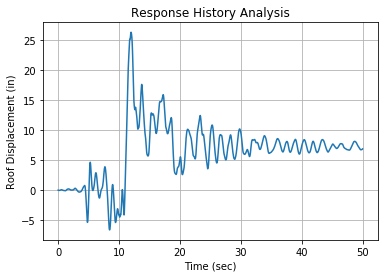

In [8]:
# Remove pushover load pattern
ops.remove('loadPattern',2)

# Reset model to its initial state
ops.reset()

# Do the gravity load analysis again
ops.integrator('LoadControl',0.0)
ops.analysis('Static')
ops.analyze(1)

# Define ground motion as uniform excitation
# Note: the dt=0.02 is the digitization of the ground motion file, not the
# analysis time step
ops.timeSeries('Path',3,'-filePath','tabasFN.txt','-dt',0.02,'-factor',g)
#                               tag dir accel timeSeriesTag
ops.pattern('UniformExcitation',3,1,'-accel',3)

# Plot ground acceleration
gm = np.loadtxt('tabasFN.txt')
Ngm = len(gm)
Tmax = 0.02*Ngm

plt.plot(np.arange(0,Tmax,0.02),gm)
plt.xlabel('Time (sec)')
plt.ylabel('Ground Acceleration (g)')
plt.title('Earthquake Ground Motion')
plt.grid()
plt.show()


# Damping ratios for modes 1 and 2
zeta1 = 0.03
zeta2 = 0.02

# OpenSees eigenvalue analysis
omegaSquared = ops.eigen(2)
omega1 = omegaSquared[0]**0.5
omega2 = omegaSquared[1]**0.5

# Compute Rayleigh damping coefficients
A = np.zeros(shape=(2,2))
A[0,0] = 1/omega1; A[0,1] = omega1
A[1,0] = 1/omega2; A[1,1] = omega2

b = np.zeros(2)
b[0] = 2*zeta1
b[1] = 2*zeta2

# Solve linear system Ax=b
x = np.linalg.solve(A,b)

#             M    KT  KI  Kn
ops.rayleigh(x[0],0.0,0.0,x[1])


ops.analysis('Transient')
ops.integrator('Newmark',0.5,0.25)

# Analysis time step and number of steps
dt = 0.01
Nsteps = int(Tmax/dt)

tPlot = []
Uplot = []
for i in range(Nsteps):
    ok = ops.analyze(1,dt)
    if ok < 0:
        break
    tPlot = np.append(tPlot,ops.getTime())
    Uplot = np.append(Uplot,ops.nodeDisp(3,1))
    
plt.plot(tPlot,Uplot)
plt.xlabel('Time (sec)')
plt.ylabel('Roof Displacement (in)')
plt.title('Response History Analysis')
plt.grid()
plt.show()    

# Running OpenSeesPy in a Terminal at DesignSafe

### New->Terminal in JupyterHub 

### Change in to your MyData/ directory

<code>
~$ cd MyData
</code>

### Convert your Jupyter Notebook (.ipynb extension) to a Python script
+ #### Creates Notebook.py in your working directory
<code>
~/MyData$ jupyter nbconvert Notebook.ipynb --to python
</code>

### Run the Python script

+ #### You will not see any plots, but you will see warnings and errors from OpenSees
+ #### Running large jobs in a terminal, e.g., batched analyses, avoids overhead of Jupyter Notebooks
<code>
~/MyData$ python Notebook.py
</code>

    

# Acknowledgments

+ ### OpenSeesPy -- Minjie Zhu, Frank McKenna
+ ### DesignSafe and TACC -- Ellen Rathje, Jamie Padgett, Tim Cockerill, Natalie Henriques, Charlie Dey

# Questions?

+ ### michael.scott@oregonstate.edu